### DECISION TREE REGERSSOR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes=load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
x=pd.DataFrame(data=diabetes['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [11]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
y=diabetes['target']

In [13]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [15]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
179,-0.023677,-0.044642,-0.015906,-0.012556,0.020446,0.041274,-0.043401,0.034309,0.014074,-0.009362
300,0.016281,-0.044642,0.073552,-0.041235,-0.004321,-0.013527,-0.013948,-0.001116,0.042897,0.044485
39,-0.001882,0.050680,0.014272,-0.074527,0.002559,0.006202,-0.013948,-0.002592,0.019196,0.003064
405,0.048974,0.050680,0.123131,0.083844,-0.104765,-0.100895,-0.069172,-0.002592,0.036644,-0.030072
96,0.056239,0.050680,0.009961,0.049415,-0.004321,-0.012274,-0.043401,0.034309,0.060791,0.032059


In [16]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=dr.predict(x_test)

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.03905385409016848
54.83783783783784
4907.144144144144


[Text(0.5188088423797736, 0.9736842105263158, 'x[8] <= -0.004\nsquared_error = 6205.971\nsamples = 331\nvalue = 152.088'),
 Text(0.31519901432107494, 0.9210526315789473, 'x[2] <= 0.006\nsquared_error = 3256.421\nsamples = 167\nvalue = 108.874'),
 Text(0.4170039283504243, 0.9473684210526316, 'True  '),
 Text(0.1838810555162659, 0.868421052631579, 'x[5] <= 0.113\nsquared_error = 2331.459\nsamples = 130\nvalue = 95.954'),
 Text(0.1810522012022631, 0.8157894736842105, 'x[6] <= 0.021\nsquared_error = 2156.861\nsamples = 129\nvalue = 94.736'),
 Text(0.09775017680339462, 0.7631578947368421, 'x[0] <= 0.069\nsquared_error = 2955.623\nsamples = 62\nvalue = 106.919'),
 Text(0.07553925035360678, 0.7105263157894737, 'x[8] <= -0.043\nsquared_error = 2647.489\nsamples = 60\nvalue = 103.333'),
 Text(0.039603960396039604, 0.6578947368421053, 'x[4] <= -0.048\nsquared_error = 2282.539\nsamples = 22\nvalue = 84.773'),
 Text(0.021216407355021217, 0.6052631578947368, 'x[9] <= -0.038\nsquared_error = 162.744

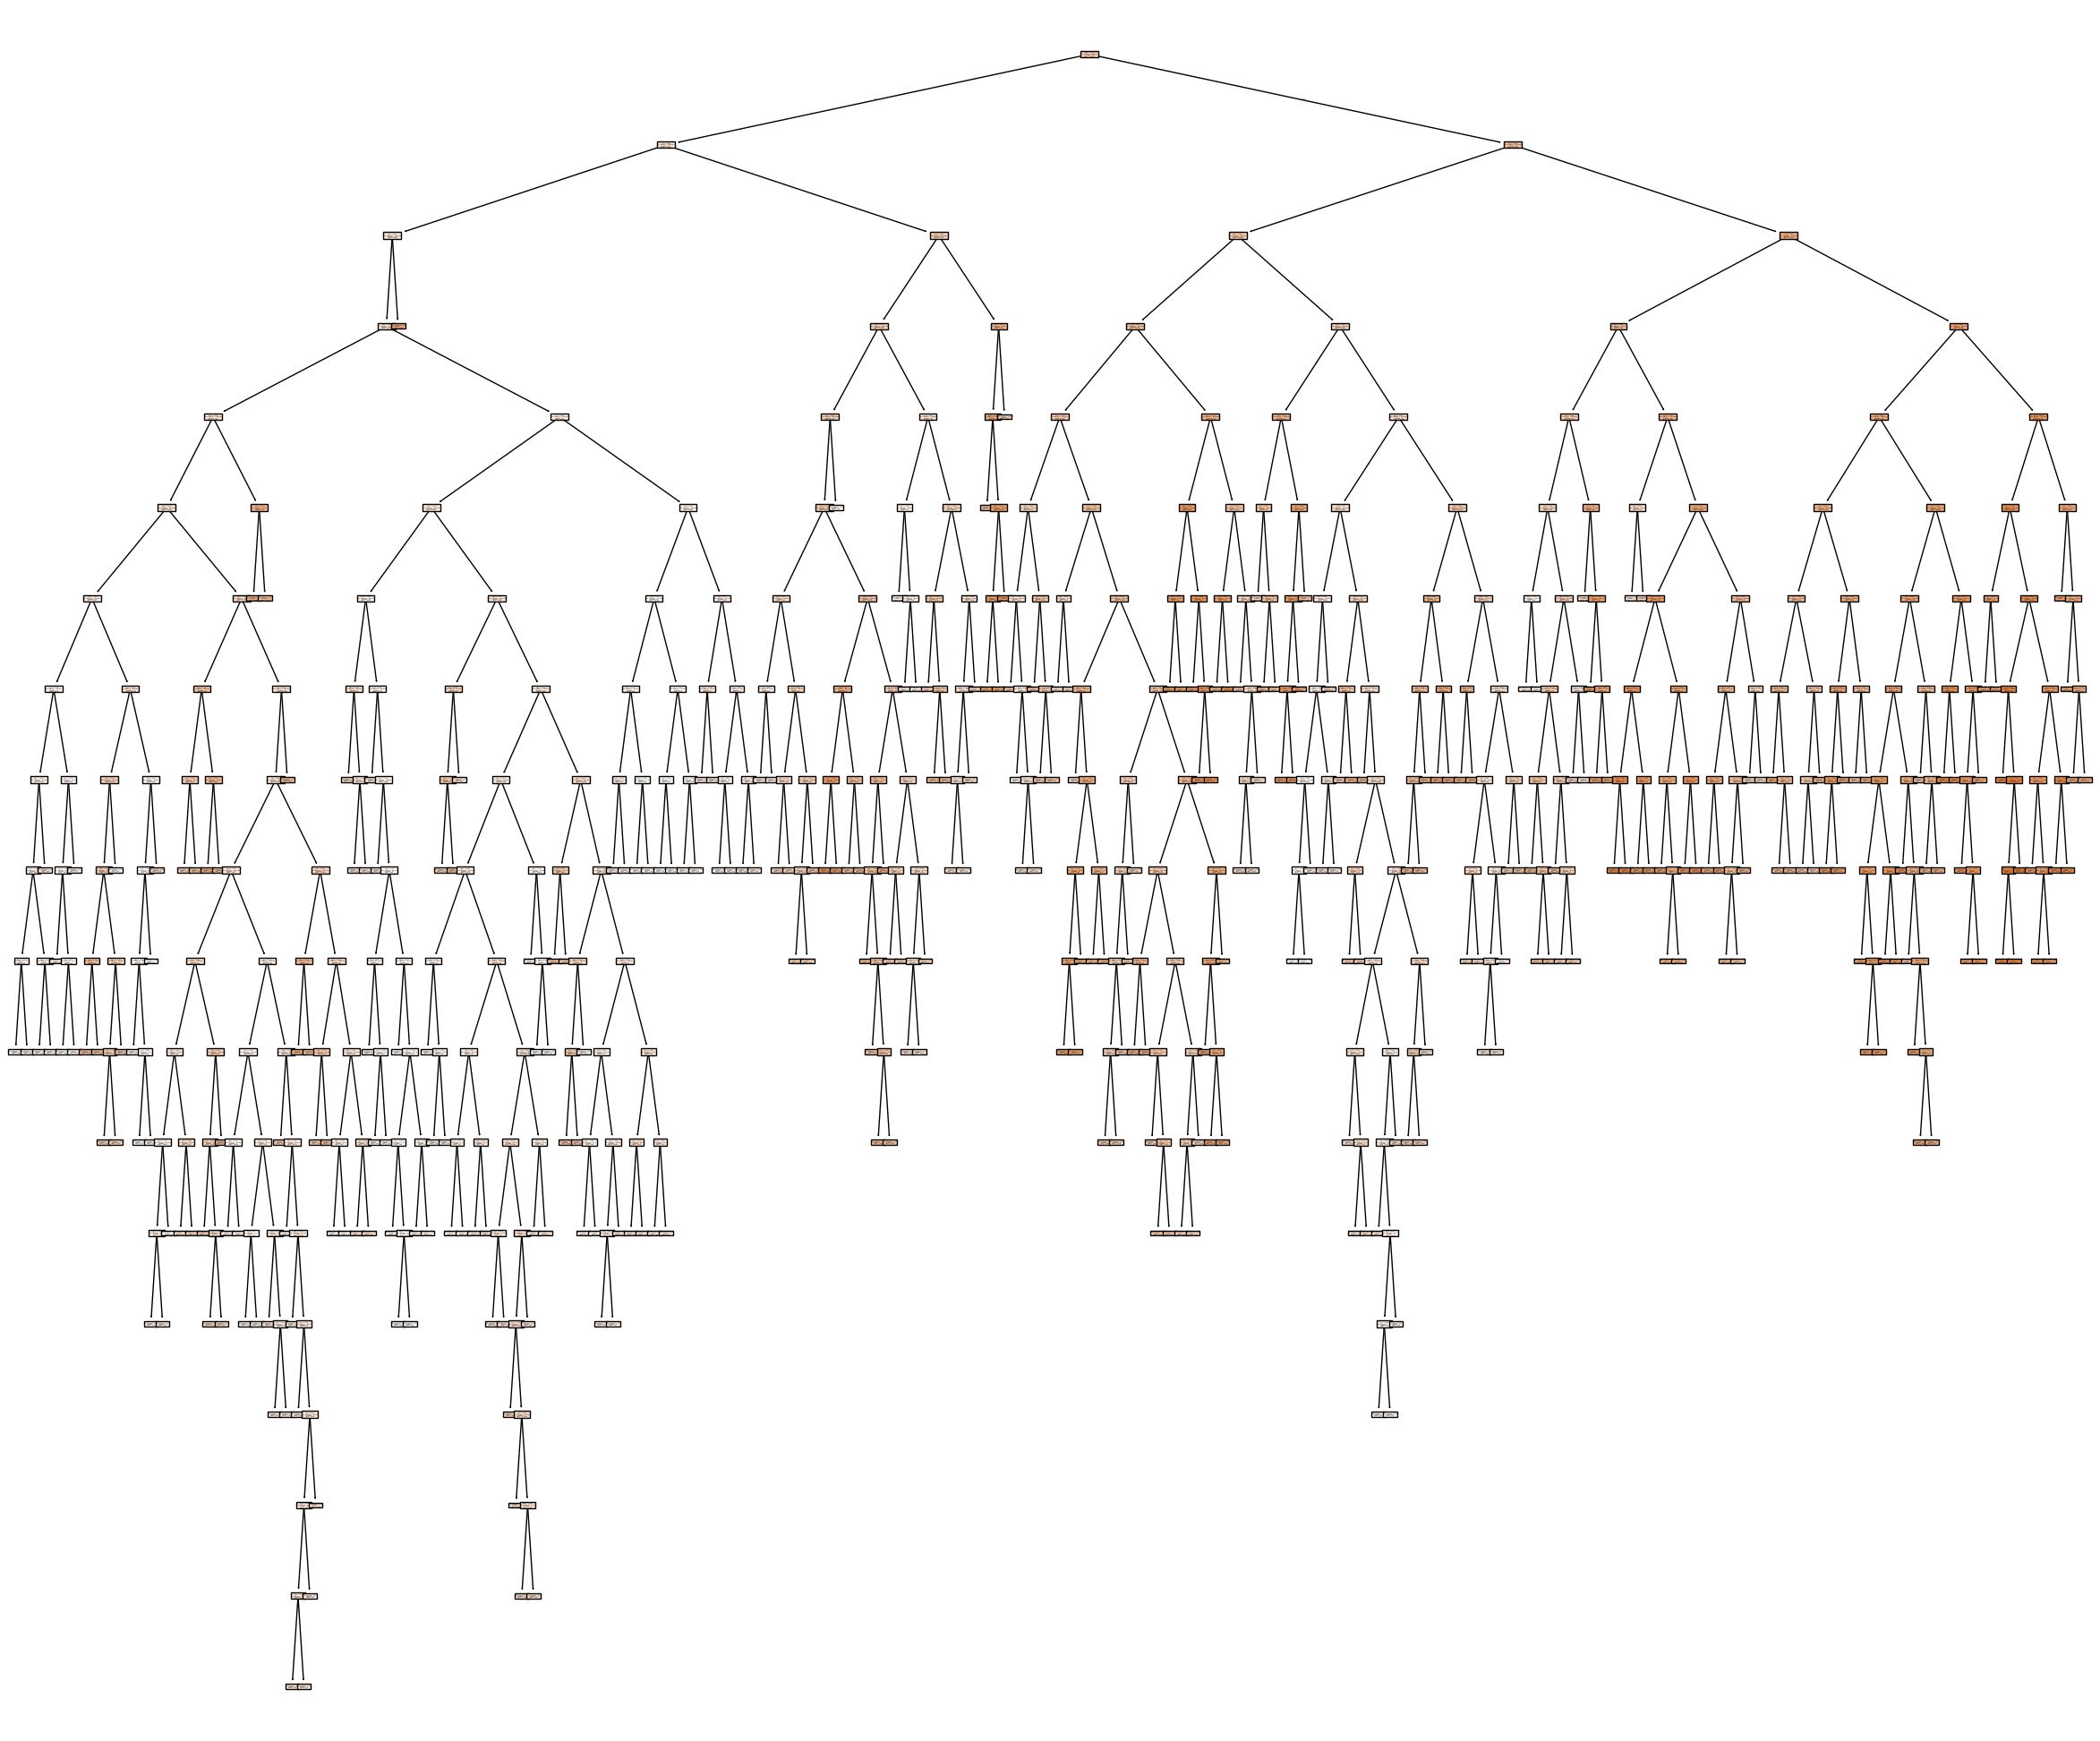

In [34]:
from sklearn import tree
plt.figure(figsize=(30,25))
tree.plot_tree(dr,filled=True)

In [21]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [22]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [25]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=dr,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [27]:
grid.fit(x_train,y_train)

c:\Users\dell\Documents\code\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dell\Documents\code\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dell\Documents\code\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\dell\Documents\code\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [35]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [28]:
y_pred1=grid.predict(x_test)

In [29]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1))

0.24018366828132742
48.16673158802192
3880.059542034136


In [30]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [32]:
selectedmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[2] <= 0.057\nfriedman_mse = 6205.971\nsamples = 331\nvalue = 152.088'),
 Text(0.25, 0.7, 'x[9] <= -0.016\nfriedman_mse = 5227.897\nsamples = 283\nvalue = 139.777'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[8] <= -0.048\nfriedman_mse = 4001.22\nsamples = 109\nvalue = 118.193'),
 Text(0.0625, 0.3, 'x[3] <= -0.013\nfriedman_mse = 1591.997\nsamples = 38\nvalue = 83.947'),
 Text(0.03125, 0.1, 'friedman_mse = 1726.123\nsamples = 33\nvalue = 87.242'),
 Text(0.09375, 0.1, 'friedman_mse = 162.16\nsamples = 5\nvalue = 62.2'),
 Text(0.1875, 0.3, 'x[6] <= -0.012\nfriedman_mse = 4327.066\nsamples = 71\nvalue = 136.521'),
 Text(0.15625, 0.1, 'friedman_mse = 3386.998\nsamples = 25\nvalue = 164.04'),
 Text(0.21875, 0.1, 'friedman_mse = 4202.724\nsamples = 46\nvalue = 121.565'),
 Text(0.375, 0.5, 'x[0] <= 0.014\nfriedman_mse = 5521.646\nsamples = 174\nvalue = 153.299'),
 Text(0.3125, 0.3, 'x[2] <= -0.029\nfriedman_mse = 5642.065\nsamples = 88\nvalue = 138.557'),
 Text(0.2812

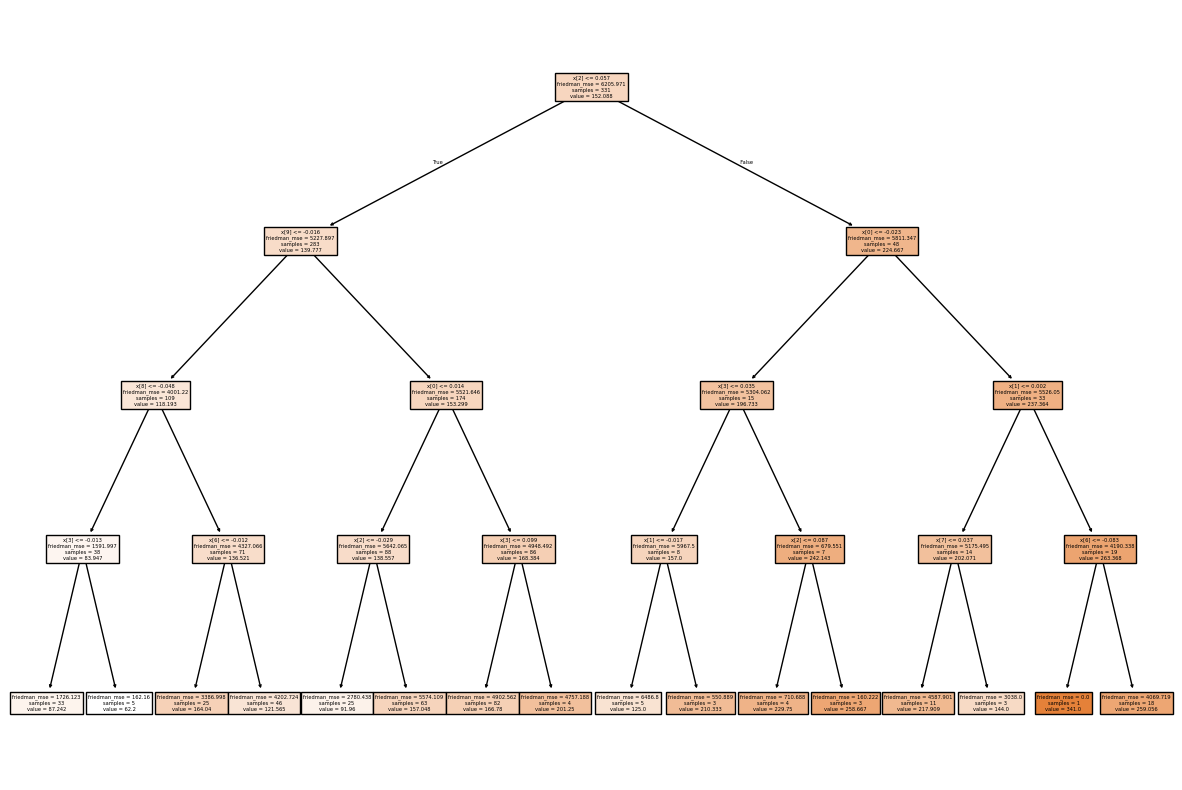

In [33]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)